# Loan Grade System with Tensor Flow

- This dataset contains the full LendingClub data available from their site.
- Using TensorFlow ANN to make predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_19796\3924281153.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression= 'gzip')


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_19796\873071740.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression= 'gzip')


In [ ]:
df

## preprocessing

In [3]:
df = df.sample(frac=0.5, axis=0, random_state= 42).reset_index(drop = True)

In [ ]:
df

## Dealing with Missing Values

In [4]:
df.isnull().mean().sort_values()

id                                            0.000000
fico_range_high                               0.000017
hardship_flag                                 0.000017
revol_bal                                     0.000017
initial_list_status                           0.000017
                                                ...   
hardship_reason                               0.995193
hardship_dpd                                  0.995193
hardship_loan_status                          0.995193
orig_projected_additional_accrued_interest    0.996196
member_id                                     1.000000
Length: 151, dtype: float64

In [5]:
# dropping all columns that have missing values more than 30%
df = df.drop(df.loc[:, df.isnull().mean().sort_values() > .3].columns, axis = 1)

In [ ]:
df

In [6]:
# dropping row missing values
df = df.dropna(axis=0).reset_index(drop=True)


In [ ]:
df

In [7]:
# Making sure no more missing value

df.isna().sum().sum()

0

## Feature Selection

In [9]:
# Gonna list unique values for each categorical col, to know which one too many values and to drop them. 

unneeded_col = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code']

In [10]:
{column: list(df[column].unique()) for column in df.drop(unneeded_col, axis = 1).columns if df.dtypes[column] == 'object'}

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'issue_d': ['Feb-2015',
  'Dec-2017',
  'Feb-2018',
  'Aug-2016',
  'Oct-2016',
  'Jan-2018',
  'Jan-2015',
  'Sep-2014',
  'May-2015',
  'Apr-2016',
  'Sep-2016',
  'Oct-2017',
  'Jun-2015',
  'Jun-2013',
  'Oct-2013',
  'Jul-2017',
  'May-2018',
  'Jan-2013',
  'Jan-2017',
  'Nov-2018',
  'Jul-2014',
  'Sep-2018',
  'Aug-2017',
  'Oct-2015',
  'Jul-2016',
  'Aug-2018',
  'Aug-2015',
  'Sep-2015',
  'Feb-2017',
  'Mar-2017',
  'Mar-2018',
  'Nov-2014',
  'Mar-2013',
  'Oct-2014',
  'Apr-2015',
  'Feb-2014',
  'Nov-2017',
  'Apr-2013',
  'May-2013',
  'Mar-2014',
  'Jul-2018',
  'Dec-2016',
  'Jul-201

In [11]:
df = df.drop(unneeded_col, axis = 1)

In [12]:
# Dealing with Date features

date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [13]:
df['issue_d']

0         Feb-2015
1         Dec-2017
2         Feb-2018
3         Aug-2016
4         Aug-2016
            ...   
826525    May-2016
826526    Jun-2013
826527    Dec-2013
826528    Aug-2015
826529    Jul-2015
Name: issue_d, Length: 826530, dtype: object

In [14]:
df.loc[0, 'issue_d']

'Feb-2015'

In [15]:
df.loc[0, 'issue_d'][0:3]

'Feb'

In [16]:
df.loc[0, 'issue_d'][-4:]

'2015'

In [17]:
# pivoting date columns values into month and year as new columns. 
# gonna loop through them

for column in date_columns:
    df[column + '_month'] = df[column].apply(lambda x: x[0:3])
    df[column + '_year'] = df[column].apply(lambda x: x[-4:])

In [ ]:
df

In [18]:
# dropping the orginal date columns
df =df.drop(date_columns, axis = 1)

In [19]:
# encoding date_month cols
date_mon_col = ['issue_d_month','earliest_cr_line_month','last_pymnt_d_month','last_credit_pull_d_month']

In [20]:
month_ordering = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [21]:
for column in date_mon_col:
    df[column] = df[column].apply(lambda x: month_ordering.index(x))

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [24]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,Verified,Current,n,debt_consolidation,CA,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,687.65,794.0,790.0,0.0,1.0,Individual,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N,1,2015,9,1981,2,2019,2,2019
1,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,Not Verified,Fully Paid,n,debt_consolidation,MA,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,4762.18,744.0,740.0,0.0,1.0,Individual,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N,11,2017,5,2005,9,2018,9,2018
2,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,Verified,Current,n,debt_consolidation,CA,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,752.96,659.0,655.0,0.0,1.0,Individual,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N,1,2018,6,1999,2,2019,2,2019
3,20000.0,20000.0,20000.0,36 months,9.49,640.57,B,10+ years,MORTGAGE,100000.0,Not Verified,Fully Paid,n,debt_consolidation,NV,16.43,1.0,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,w,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,2838.73,809.0,805.0,0.0,1.0,Individual,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,N,Cash,N,7,2016,7,1990,8,2017,2,2019
4,24575.0,24575.0,24575.0,60 months,14.49,578.08,C,5 years,RENT,120000.0,Source Verified,Fully Paid,n,credit_card,CA,17.40,0.0,680.0,684.0,0.0,14.0,0.0,18320.0,80.0,21.0,w,0.00,0.00,28148.211616,28148.21,24575.00,3573.21,0.0,0.0,0.0,470.02,714.0,710.0,0.0,1.0,Individual,0.0,0.0,54296.0,22900.0,3.0,4525.0,3649.0,78.9,0.0,0.0,69.0,114.0,32.0,11.0,0.0,33.0,11.0,1.0,5.0,8.0,5.0,5.0,6.0,10.0,15.0,8.0,14.0,0.0,0.0,0.0,3.0,95.2,80.0,0.0,0.0,70820.0,54296.0,17300.0,47920.0,N,Cash,N,7,2016,1,2007,6,2018,2,2019
...,...,...,...,...,...,...,...,...,...,...,..

In [25]:
# changing date_col to float values

df[['last_pymnt_d_year','last_credit_pull_d_year','earliest_cr_line_year','issue_d_year']] = df[['last_pymnt_d_year','last_credit_pull_d_year','earliest_cr_line_year','issue_d_year']].astype(float)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826530 entries, 0 to 826529
Data columns (total 91 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   826530 non-null  float64
 1   funded_amnt                 826530 non-null  float64
 2   funded_amnt_inv             826530 non-null  float64
 3   term                        826530 non-null  object 
 4   int_rate                    826530 non-null  float64
 5   installment                 826530 non-null  float64
 6   grade                       826530 non-null  object 
 7   emp_length                  826530 non-null  object 
 8   home_ownership              826530 non-null  object 
 9   annual_inc                  826530 non-null  float64
 10  verification_status         826530 non-null  object 
 11  loan_status                 826530 non-null  object 
 12  pymnt_plan                  826530 non-null  object 
 13  purpose       

## Encoding

In [27]:
# Before encoding the rest of the char var. Got to know their unique values.
# Before encoding the rest of the characters. Got to know their unique values.

{column: list(df[column].unique()) for column in df.columns if df[column].dtype == 'object'}


{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'loan_status': ['Current',
  'Fully Paid',
  'Charged Off',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'In Grace Period',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'house',
  'small_business',
  'major_purchase',
  'home_improvement',
  'other',
  'medical',
  'car',
  'renewable_energy',
  'moving',
  'vacation',
  'wedding',
  'educational'],
 'addr_state': ['CA',
  'MA',
  'NV',
  'OH',
  'FL',
  'MI',
  'IN',
  'ID',
  'PA',
  'TX',
  'OR',
  'NY',
  'GA',
  'VA',
  'TN',
  'AL',
  'MD',
  'KY',
  'MN',
  'CO',
  'WY',
  'LA',
  'NJ',
  'A

In [28]:
sorted(df['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [43]:
data = df.copy()

In [44]:
 # selection all features based on binary, ordinal, and nominal
 
target = 'grade'
 


binary_features = ['term', 'pymnt_plan','initial_list_status','application_type','hardship_flag','disbursement_method','debt_settlement_flag']
# we need to know which value to be 1 and 0
binary_positive = [' 60 months', 'y','w','Individual','Y','Cash','Y']





ordinal_feature = ['emp_length']
#getting the correct order of the emp length
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years', 
    '10+ years'
]


nominal_feature = ['home_ownership','verification_status','loan_status', 'purpose','addr_state']

In [45]:
def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    

def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

"""
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis = 1)
    df_new = df_new.drop(column, axis = 1)
    return df_new

"""

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column], drop_first=True)
    dummies = dummies.astype(int)
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [35]:
# indexing the binanry features wit their positive values
list(zip(binary_features, binary_positive))

[('term', ' 60 months'),
 ('pymnt_plan', 'y'),
 ('initial_list_status', 'w'),
 ('application_type', 'Individual'),
 ('hardship_flag', 'Y'),
 ('disbursement_method', 'Cash'),
 ('debt_settlement_flag', 'Y')]

In [46]:
### Performing Enoding

for feature, positive_value in zip(binary_features, binary_positive):
    binary_encode(data, feature, positive_value)
    
ordinal_encode(data, 'emp_length', emp_ordering)

for feature in nominal_feature:
    data = onehot_encode(data, feature)

In [47]:
(data.dtypes == 'object').sum()

1

In [53]:
data[target].value_counts()

grade
2    242612
1    240025
0    151679
3    120849
4     50987
5     15711
6      4667
Name: count, dtype: int64

In [52]:
# Encoding target column and mapping
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])

target_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
target_mappings

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [54]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,32000.0,32000.0,32000.0,1,10.49,687.65,1,10,120000.0,0,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,1,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,687.65,794.0,790.0,0.0,1.0,1,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,0,1,0,1,2015.0,9,1981.0,2,2019.0,2,2019.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6025.0,6025.0,6025.0,0,10.91,197.00,1,10,52000.0,0,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,1,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,4762.18,744.0,740.0,0.0,1.0,1,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,0,1,0,11,2017.0,5,2005.0,9,2018.0,9,2018.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25000.0,25000.0,25000.0,1,26.30,752.96,4,10,65000.0,0,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,1,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,752.96,659.0,655.0,0.0,1.0,1,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,0,1,0,1,2018.0,6,1999.0,2,2019.0,2,2019.0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20000.0,20000.0,20000.0,0,9.49,640.57,1,10,100000.0,0,16.43,1.0,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,1,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,2838.73,809.0,805.0,0.0,1.0,1,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,0,1,0,7,2016.0,7,1990.0,8,2017.0,2,2019.0,1

### Splitting and Scaling

In [55]:
y = data['grade']
X = data.drop('grade', axis = 1)

In [56]:
# Standardisation: transforming data into a common format. values of several variables intoa simialr range (0,1)
sclaer = StandardScaler()
X = sclaer.fit_transform(X)

In [57]:
# Train Test Split
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [59]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print('Accuracy score using Random forerst classifier is', metrics.accuracy_score(y_pred, y_test))

#y_pred

Accuracy score is 0.9068112066914288


## Modeling and Training

In [62]:
# The snippet defines a neural network model with one input layer, two hidden layers, one output layer,

inputs = tf.keras.Input(shape=(161,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 20

history = model.fit(
    X_train, 
    y_train,
    validation_split = 0.2,
    batch_size=batch_size, 
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()] 
)



Epoch 1/20


14465/14465 [==============================] - 57s 4ms/step - loss: 0.2701 - accuracy: 0.8905 - val_loss: 0.1805 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 2/20
14465/14465 [==============================] - 58s 4ms/step - loss: 0.1459 - accuracy: 0.9402 - val_loss: 0.1292 - val_accuracy: 0.9469 - lr: 0.0010
Epoch 3/20
14465/14465 [==============================] - 53s 4ms/step - loss: 0.1138 - accuracy: 0.9529 - val_loss: 0.1044 - val_accuracy: 0.9548 - lr: 0.0010
Epoch 4/20
14465/14465 [==============================] - 55s 4ms/step - loss: 0.0971 - accuracy: 0.9596 - val_loss: 0.0939 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 5/20
14465/14465 [==============================] - 60s 4ms/step - loss: 0.0862 - accuracy: 0.9642 - val_loss: 0.0777 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 6/20
14465/14465 [==============================] - 51s 4ms/step - loss: 0.0785 - accuracy: 0.9678 - val_loss: 0.0812 - val_accuracy: 0.9670 - lr: 0.0010
Epoch 7/20
14465/14465 [============

### Results

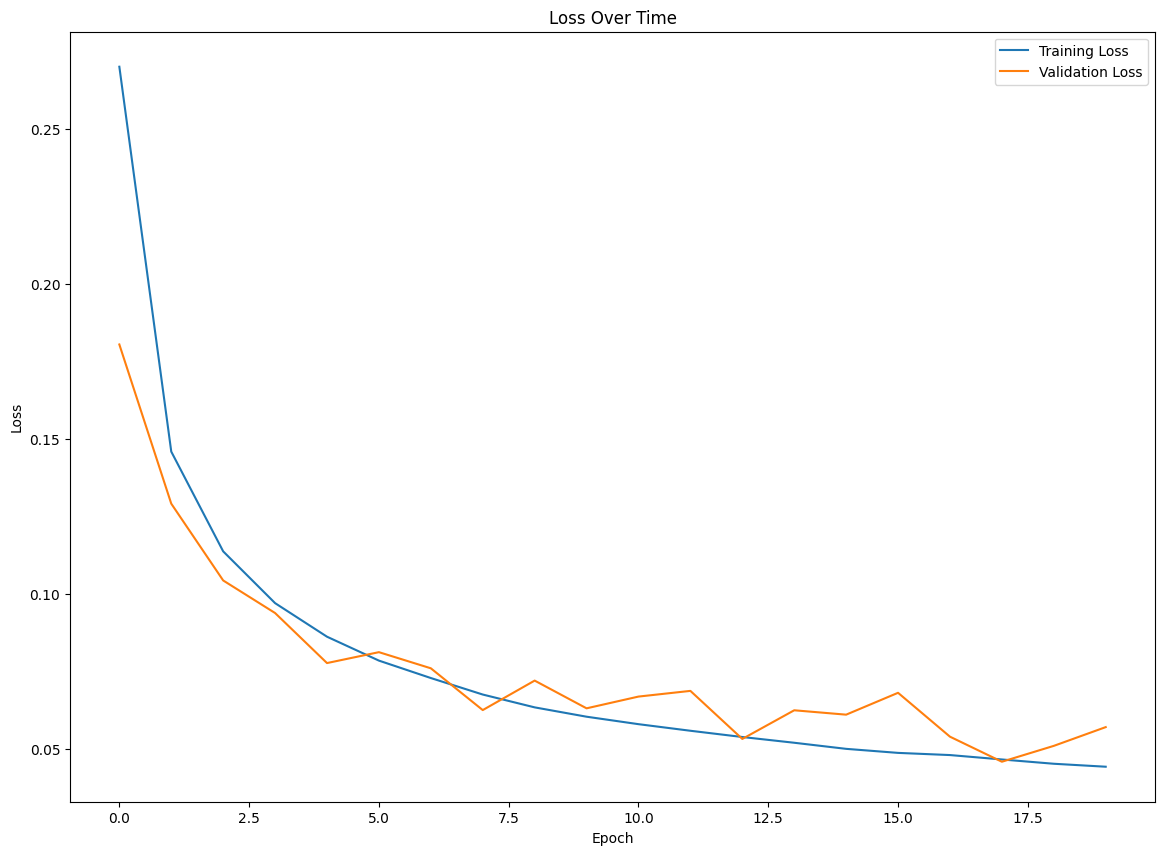

In [64]:
plt.figure(figsize=(14,10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

plt.show()

It could have merge well if we do enough epochs.

## Model Evaluation

In [65]:
model.evaluate(X_test, y_test)

7749/7749 [==============================] - 28s 4ms/step - loss: 0.0551 - accuracy: 0.9802


[0.05512213706970215, 0.980198323726654]